In [2]:
% matplotlib inline
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.io
from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler

In [7]:
data = scipy.io.loadmat('data/ex6data1.mat')
X = data['X']
y = data['y'].flatten()

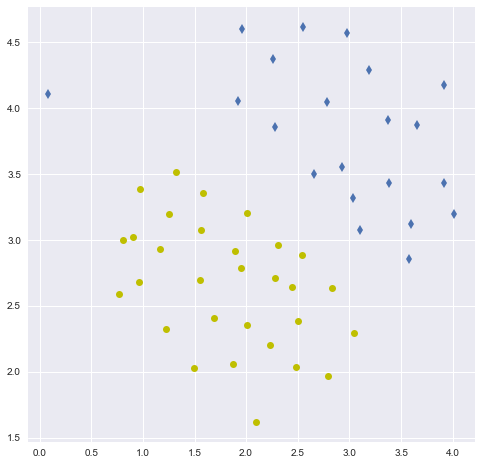

In [50]:
def plotData(X, y, ax):
    """plots the data points with + for the positive examples
    and o for the negative examples. X is assumed to be a Mx2 matrix.

    Note: This was slightly modified such that it expects y = 1 or y = 0
    """

# Find Indices of Positive and Negative Examples
    pos = np.where(y==1, True, False).flatten()
    neg = np.where(y==0, True, False).flatten()

# Plot Examples
    ax.plot(X[pos,0], X[pos, 1], 'd', linewidth=1, markersize=7)
    ax.plot(X[neg,0], X[neg, 1], 'ko', color='y', markersize=7)
    
fig, ax = plt.subplots(figsize=[8,8])
plotData(X, y, ax)

In [51]:
def visualizeBoundary(X, y, model):
    """plots a non-linear decision boundary learned by the
    SVM and overlays the data on it"""

# Plot the training data on top of the boundary
    plotData(X, y)

    # Make classification predictions over a grid of values
    x1plot = np.linspace(min(X[:,0]), max(X[:,0]), X.shape[0]).T
    x2plot = np.linspace(min(X[:,1]), max(X[:,1]), X.shape[0]).T
    X1, X2 = np.meshgrid(x1plot, x2plot)
    vals = np.zeros(X1.shape)

    for i in range(X1.shape[1]):
        this_X = np.column_stack((X1[:, i], X2[:, i]))
        vals[:, i] = model.predict(this_X)

    # Plot the SVM boundary
    #contour(X1, X2, vals, [0 0], 'Color', 'b')
    plt.contour(X1, X2, vals, levels=[0.0, 0.0])

def visualizeBoundaryLinear(X, y, model):
    """plots a linear decision boundary
    learned by the SVM and overlays the data on it
    """
    fig, ax = plt.subplots(figsize=[8,8])
    
    w = model.coef_.flatten()
    b = model.intercept_.flatten()
    xp = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
    yp = -(w[0]*xp + b)/w[1]
    plotData(X, y, ax)
    ax.plot(xp, yp, '-b')

c:\users\matka\anaconda3\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


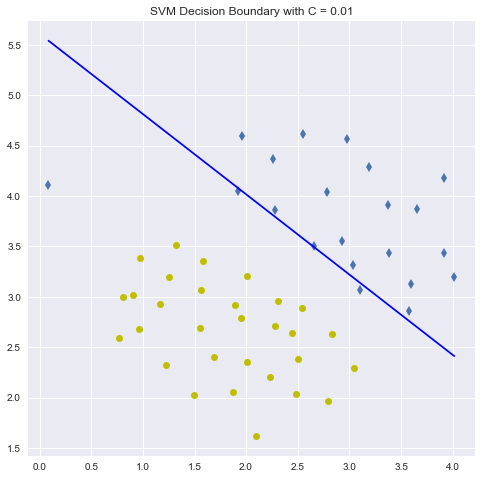

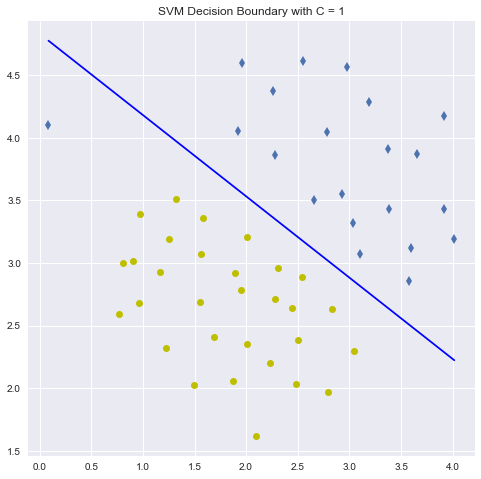

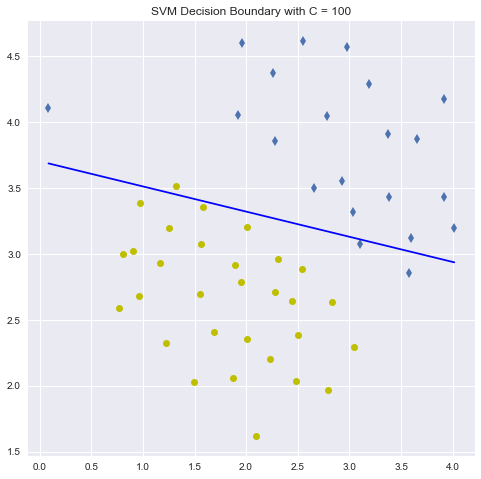

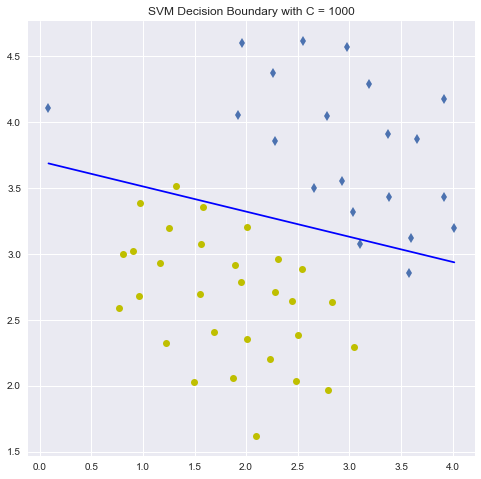

In [67]:
from sklearn import svm

def visualize_svc(C):
    model = svm.SVC(C=C, kernel='linear', tol=1e-3, max_iter=20).fit(X, y)
    visualizeBoundaryLinear(X, y, model)
    title = 'SVM Decision Boundary with C = ' + str(C)
    plt.title(title)

c_list = [.01, 1, 100, 1000]
for C in c_list:
    visualize_svc(C)

In [75]:
def gaussianKernel(x1, x2, sigma):
    """returns a gaussian kernel between x1 and x2
    and returns the value in sim
    """

# Ensure that x1 and x2 are column vectors
#     x1 = x1.ravel()
#     x2 = x2.ravel()

# You need to return the following variables correctly.
    sim = 0

# ====================== YOUR CODE HERE ======================
# Instructions: Fill in this function to return the similarity between x1
#               and x2 computed using a Gaussian kernel with bandwidth
#               sigma
#
#
# =============================================================
    distance = np.sum(np.power(x1 - x2, 2))
    return np.exp(-distance / (2 * np.power(sigma, 2) ) )

x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2
EXPECTED_GAUSIAN_KERNEL_SIM = 0.324652

sim = gaussianKernel(x1, x2, sigma)
np.testing.assert_almost_equal(sim, EXPECTED_GAUSIAN_KERNEL_SIM, decimal=6)
print(f'Sim of gausian kernell for testing data is {sim}, expecting: {EXPECTED_GAUSIAN_KERNEL_SIM}')

Sim of gausian kernell for testing data is 0.32465246735834974, expecting: 0.324652
